This python notebook is based on the book "Python for Finance: Mastering Data-Driven Finance" by Yves Hilpisch.

Elaborated by: Francisco Arizola

# Part III: Financial Data Science

## Chapter 11: Mathematical Tools

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import math

# Style pyplot with serif font
plt.rcParams['font.family'] = 'serif'

# 3D plotting library
from mpl_toolkits.mplot3d import Axes3D

# Comment the next line if you do not have cufflinks and plotly installed
!pip install cufflinks plotly

import pandas as pd
import cufflinks as cf 
import plotly.offline as plyo

# Initialize plotly to work in offline mode
plyo.init_notebook_mode(connected=True)

# Optional: if you are using Jupyter Notebook, you might want to enable inline plotting
cf.go_offline()

### Approximation

In [2]:
# Define a function comprised of a trigonometric term and a linear term 
def f(x):
 return np.sin(x) + 0.5 * x

# Create a function for graphic representation
def create_plot(x, y, styles, labels, axlabels):
 plt.figure(figsize=(10, 6))
 for i in range(len(x)):
     plt.plot(x[i], y[i], styles[i], label=labels[i])
     plt.xlabel(axlabels[0])
     plt.ylabel(axlabels[1])
 plt.legend(loc=0)

In [3]:
# The x values used for the plotting and the calculations
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)
x

array([-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913,
       -5.00090259, -4.74444605, -4.48798951, -4.23153296, -3.97507642,
       -3.71861988, -3.46216333, -3.20570679, -2.94925025, -2.6927937 ,
       -2.43633716, -2.17988062, -1.92342407, -1.66696753, -1.41051099,
       -1.15405444, -0.8975979 , -0.64114136, -0.38468481, -0.12822827,
        0.12822827,  0.38468481,  0.64114136,  0.8975979 ,  1.15405444,
        1.41051099,  1.66696753,  1.92342407,  2.17988062,  2.43633716,
        2.6927937 ,  2.94925025,  3.20570679,  3.46216333,  3.71861988,
        3.97507642,  4.23153296,  4.48798951,  4.74444605,  5.00090259,
        5.25735913,  5.51381568,  5.77027222,  6.02672876,  6.28318531])

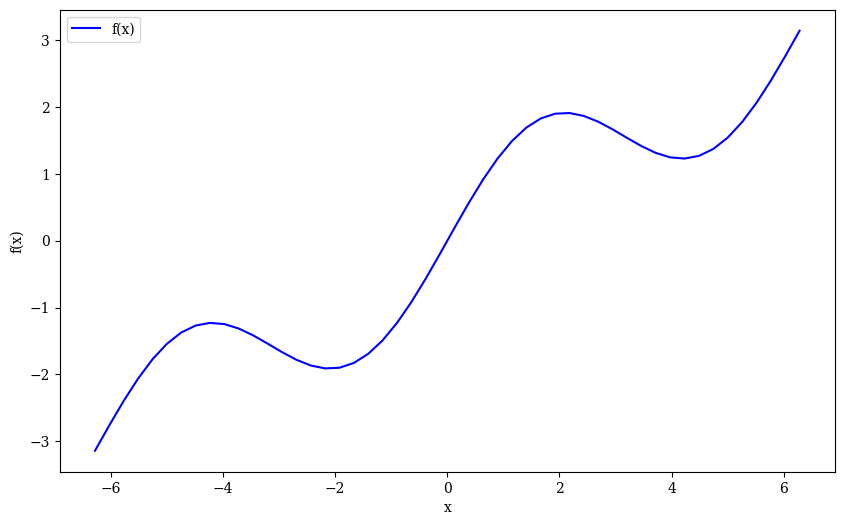

In [4]:
# Plot the figure for 'x'
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

#### Regression

Regression is a rather efficient tool when it comes to function approximation. It is not only suited to approximating one-dimensional functions but also works well in higher dimensions.

In [5]:
# Run linear regression (deg indicates the degree of the fitting polynomial)
res = np.polyfit(x, f(x), deg=1, full=True)
res

(array([ 4.28841952e-01, -6.35579212e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

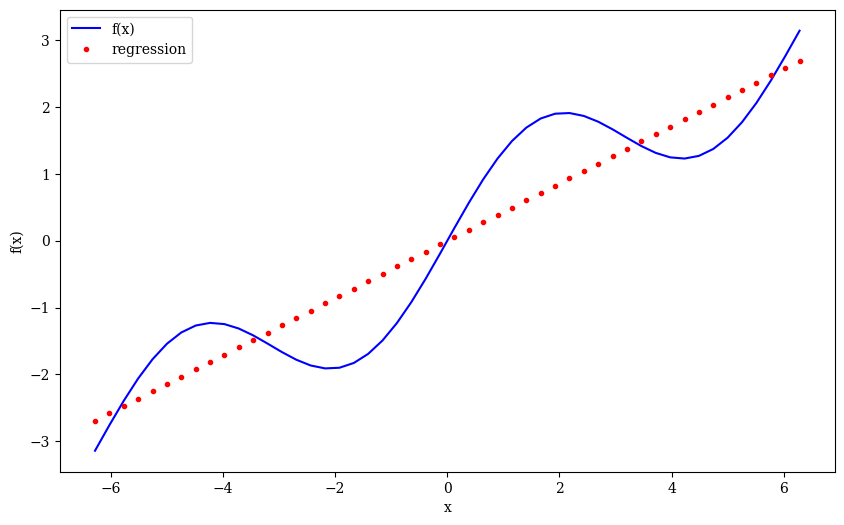

In [6]:
# Evaluation using the regression parameters
ry = np.polyval(res[0], x)

create_plot([x, x], [f(x), ry], ['b', 'r.'],['f(x)', 'regression'], ['x', 'f(x)'])

To account for the sin part of the example function, higher-order monomials are necessary. The next regression attempt takes monomials up to the order of 5 as basis functions.

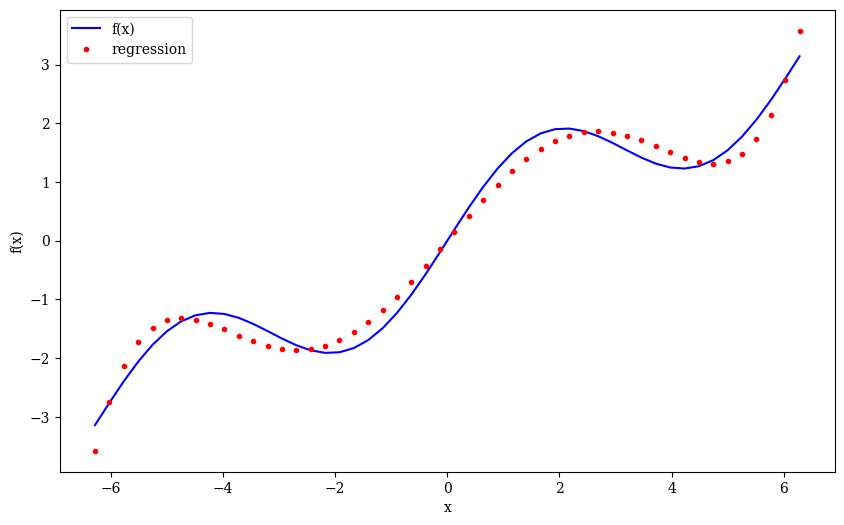

In [7]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

create_plot([x, x], [f(x), ry], ['b', 'r.'],['f(x)', 'regression'], ['x', 'f(x)'])

In [8]:
# The last attempt takes monomials up to order 7
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

# Checks if the values are equal or at least close
np.allclose(f(x), ry)

False

In [9]:
# Calculate the Mean Squared Error (MSE) for the regression values given the function values.
np.mean((f(x) - ry) ** 2)

0.001776913475951753

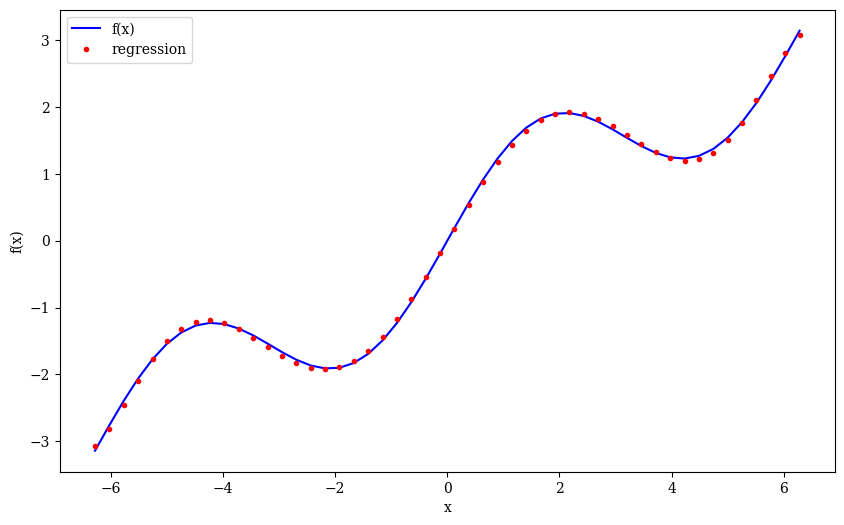

In [10]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],['f(x)', 'regression'], ['x', 'f(x)'])

### Interpolation

### Convex Optimization

In [11]:
def fm(p):
 x, y = p
 return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

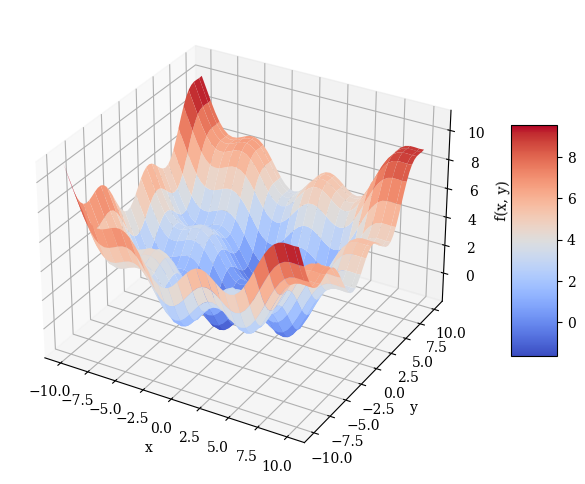

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                     cmap='coolwarm', linewidth=0.5,
                     antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

Visual inspection already reveals that this function has multiple local minima. The existence of a global minimum cannot really be confirmed by this particular graphical representation, but it seems to exist.